In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def cpudataparse(dataStr):
#     print(dataStr)
    cpu_id = dataStr.split(":")[0].strip()
    idle_info = dataStr.split(",")[3].strip("id").strip()
    return cpu_id, 100.0-float(idle_info)

In [76]:
#Data to store information
cpu_usage = {}
mem_usage = []

In [78]:
#Reading the trace file
filename = "trace_data/TraceYubi"
count = 0
with open(filename) as file:
    for line in file:
#         print(count, line)
        if (count+1)% 16 == 13:
#             print("Mem", line)
            memline = line.split(",")
            if len(memline) >= 3:
                memused = memline[2].strip("used").strip()
#             print(memused)
                mem_usage.append(float(memused))
        if (count+1)%16 < 13 and (count+1)%16 > 2:
            line = line.split("%Cpu")
#             print("Test1. ", line[1])
#             print("Test2. ", line[2])
            cid, usage   = cpudataparse(line[1])
#             cid1, usage1 = cpudataparse(line[2])
            
            if cid not in cpu_usage:
                cpu_usage[cid] = []
                
#             if cid1 not in cpu_usage:
#                 cpu_usage[cid1] = []
            
            cpu_usage[cid].append(usage)
#             cpu_usage[cid1].append(usage1)
            
            
        count += 1
        
#         if count==60:
#             break

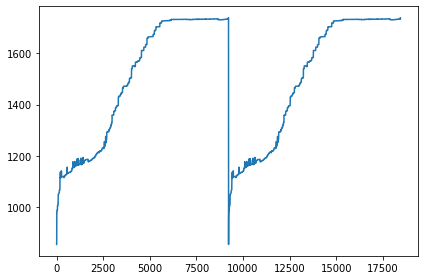

In [79]:
plt.plot(mem_usage)
plt.tight_layout()
plt.show()

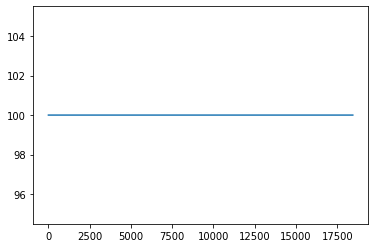

In [80]:
plt.plot(cpu_usage['0'])
plt.show()

In [81]:
# cpu_usage

In [66]:
max(mem_usage), min(mem_usage)

(1122.6, 780.1)

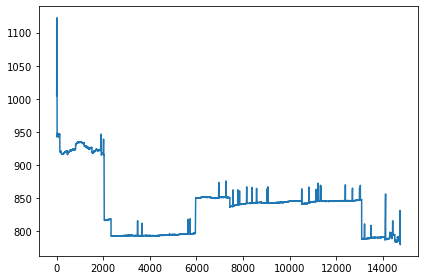

In [67]:
plt.plot(mem_usage)
plt.tight_layout()
plt.show()

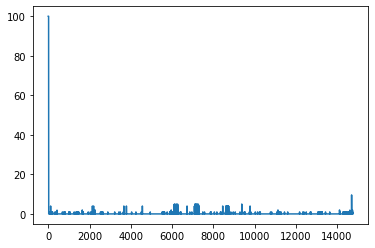

In [71]:
plt.plot(cpu_usage['0'])
plt.show()